# Классы в Python

Python - это в первую очередь язык программирования, реализованный в объектно-ориентированной парадигме, поэтому мы никак не можем обойтись без понятия класса.

**Класс** — модель для создания объектов определённого типа, описывающая их структуру (набор полей и их начальное состояние) и определяющая алгоритмы (функции или методы) для работы с этими объектами. Таким образом, классы служат для того, чтобы определять произвольные типы и в дальнейшем работать с объектами этих типов.

В отличие от многих других ООП-языков, в питоне реализовано всего два вида классов - классический класс и метакласс. На уровне синтаксиса интерфейсов и структур здесь нет.

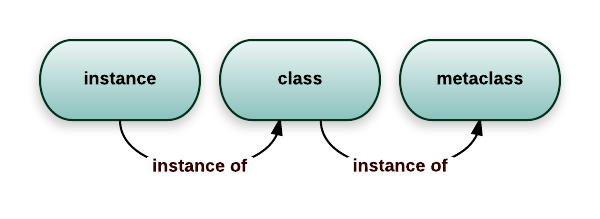

Что ж, довольно слов, пора программировать =)

Объявим простейший класс, который ничего не умеет:

In [1]:
class Nothing:
    pass

Итак, мы объявили класс. Теперь мы можем создавать объекты этого класса.

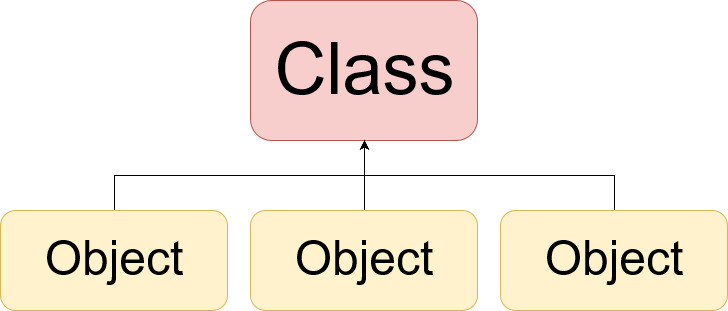

In [2]:
nothing1 = Nothing()
nothing2 = Nothing()

В Jupyter Notebook'е можем посмотреть на то, что это за объекты:

In [3]:
nothing1

In [4]:
nothing2

Посмотрим на тип созданного объекта - это и будет наш объявленный класс

In [5]:
type(nothing1), type(nothing2)

(__main__.Nothing, __main__.Nothing)

## Методы объектов классов

Давайте создадим класс, который хоть что-то умеет. Например, пусть у него будет метод, при вызове которого наш объект нашего класса будет мяукать =)

In [6]:
class Meower:
    def meow():
        print("meow!")

Инстанцируем объект нового класса:

In [7]:
cat = Meower()
cat.meow()

TypeError: meow() takes 0 positional arguments but 1 was given

И мы столкнулись с ошибкой, которая говорит, что почему-то в эту функцию подается какой-то аргумент, несмотря на то, что мы ничего туда не подавали. Давайте посмотрим, а что вообще за объект наш объявленный метод?

In [8]:
cat.meow

<bound method Meower.meow of <__main__.Meower object at 0x7fa7d8749070>>

In [9]:
print

<function print>

Обратите внимание, как различаются типы этих двух функций. В этом и кроется суть ошибки: <code>meow</code> - это не просто функция, а <i>bound method</i>, с которым нужно обращаться немного по-другому: он всегда должен принимать не меньше одного аргумента, и первый аргумент - это instance класса. Первый аргумент bound method'ов принято называть self.

Давайте перепишем наш класс в соответствии с этим.

In [10]:
class Meower:
    def meow(self):
        print("meow!")

In [11]:
cat = Meower()
cat.meow()

meow!


Заметим еще одну интересную вещь. Наш метод можно вызвать не только у инстанса класса, но и у самого класса. Но в этом случае он будет уже не bound method'ом, а обычной функцией.

In [12]:
Meower.meow

<function __main__.Meower.meow(self)>

In [13]:
Meower.meow()

TypeError: meow() missing 1 required positional argument: 'self'

Но в таком виде в эту функцию не подается автоматически аргумент self. Мы должны явно указать, для какого объекта должна быть вызвана эта функция.

In [14]:
Meower.meow(cat)

meow!


А теперь немного треша. Вглядитесь в код нашей функции <code>meow</code>: он внутри никак не использует объект кота. Поэтому текущий код сработает и вот так:

In [15]:
Meower.meow(None)

meow!


In [16]:
Meower.meow("дикая дичь")

meow!


In [17]:
Meower.meow(cat.meow)

meow!


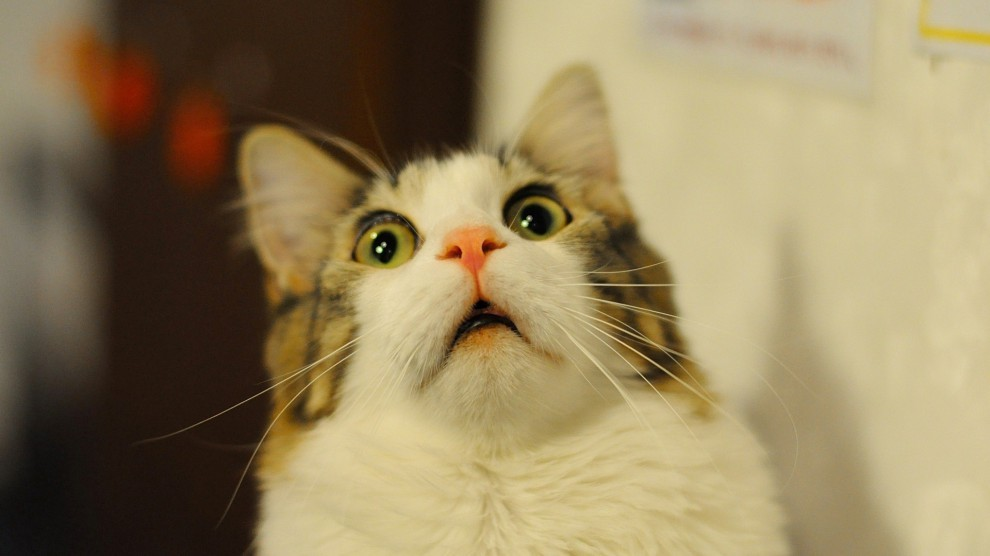

Но так, конечно, делать не стоит. Код должен быть понятным =)

## Конструктор класса

Конструктор - это метод, который вызывается у объекта сразу после его создания. Давайте напишем класс с конструктором, в котором выведем на экран уведомление о том, что объект создан.

In [18]:
class Alien:
    def __init__(self):
        print("Я родился!")

In [19]:
luntik = Alien()

Я родился!


Вообще говоря, классы и объекты классов нам нужны для того, чтобы хранить какие-то значения. Давайте посмотрим, как можно инициализировать какие-то значения внутри объекта при его создании.

In [20]:
INITIAL_BONUS = 100
INTERMEDIATE_BALANCE = 5000
ADVANCED_BALANCE = 15000

class Client:
    def __init__(self, name, balance):
        self.name = name
        self.balance = balance + INITIAL_BONUS
        
        if self.balance < INTERMEDIATE_BALANCE:
            self.level = "Basic"
        elif self.balance < ADVANCED_BALANCE:
            self.level = "Intermediate"
        else:
            self.level = "Advanced"

Мы определили какую-то логику в конструкторе класса и задали поля объекта <code>name</code>, <code>balance</code> и <code>level</code>. Инстанцируем несколько объектов, чтобы увидеть, как это работает:

In [21]:
John_Doe = Client("John Doe", 500)
Jane_Defoe = Client("Jane Defoe", 150000)

In [22]:
John_Doe.name

'John Doe'

In [23]:
Jane_Defoe.level

'Advanced'

In [24]:
Jane_Defoe.balance

150100

Мы можем определять поля объекта в любой момент во время или после его создания. Давайте добавим поле <code>email</code> к уже созданному объекту.

In [25]:
John_Doe.email = "johndoe23@gmail.com"
John_Doe.email

'johndoe23@gmail.com'

In [26]:
Jane_Defoe.email

AttributeError: 'Client' object has no attribute 'email'

При этом видим, что объект <code>Jane_Defoe</code> не поменялся.

Получить значение поля объекта или назначить его можно еще одним способом - специальными встроенными в интерпретатор питона функциями <code>getattr</code> и <code>setattr</code>:

In [27]:
getattr(John_Doe, 'email')

'johndoe23@gmail.com'

In [28]:
getattr(Jane_Defoe, 'email')

AttributeError: 'Client' object has no attribute 'email'

In [29]:
setattr(Jane_Defoe, 'email', 'jane@goo.gl')

In [30]:
Jane_Defoe.email

'jane@goo.gl'

Удалить атрибут объекта можно двумя способами:

In [31]:
del John_Doe.email

In [32]:
delattr(Jane_Defoe, 'email')

И еще одна полезная функция, с помощью которой можно посмотреть, есть ли такой атрибут у класса:

In [33]:
hasattr(John_Doe, 'name')

True

In [34]:
hasattr(John_Doe, 'email')

False

Это работает так же и для поиска методов:

In [35]:
hasattr(cat, 'meow')

True

## Атрибуты класса

Выше мы рассматривали атрибуты, хранящиеся в каждом конкретном объекте. А что если нам нужно значение, которое нам понадобится использовать внутри всех объектов класса? Для этого предназначены атрибуты класса. Добавим таким образом название банка, которым пользуется клиент.

In [37]:
class Client:
    bank_name = "Sberbank"
    
    def __init__(self, name, balance):
        self.name = name
        self.balance = balance + INITIAL_BONUS
        
        if self.balance < INTERMEDIATE_BALANCE:
            self.level = "Basic"
        elif self.balance < ADVANCED_BALANCE:
            self.level = "Intermediate"
        else:
            self.level = "Advanced"

Так же, как и в случае с изменением объектов на лету, на лету можно изменять и структуру класса. Но так делать не рекомендуется из-за того, что сложно будет предсказать поведение кода человеку, который увидит его в первый раз.

In [38]:
Client.country = "Russia"

In [39]:
John_Doe = Client("John Doe", 500)
Jane_Defoe = Client("Jane Defoe", 150000)

In [41]:
Jane_Defoe.country

'Russia'

In [42]:
Jane_Defoe.bank_name

'Sberbank'

При этом, если мы изменяем хоть какой-то атрибут класса на лету, он меняется у всех объектов.

In [43]:
Client.country = "Russian Federation"
Jane_Defoe.country

'Russian Federation'

Однако если мы изменим этот атрибут только у конкретного объекта, все остальные объекты останутся неизменными, поскольку в такой записи мы назначаем объекту атрибут объекта, а не всего класса.

In [44]:
John_Doe.country = 'Britain'
Jane_Defoe.country

'Russian Federation'

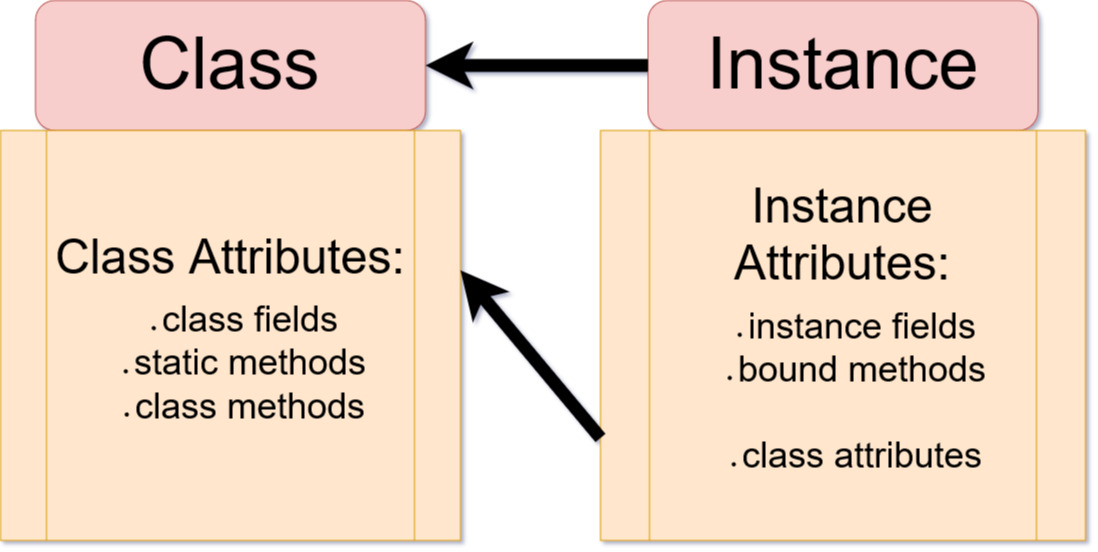

In [45]:
class A:
    class_attribute = "class_attribute"
    instance_attribute = "instance_class_attribute"
    
    def __init__(self, arg):
        self.instance_attribute = arg

In [46]:
a = A("a")
b = A("b")

In [47]:
b.class_attribute = "b_class"

In [49]:
b.class_attribute

'b_class'

In [50]:
a.class_attribute, a.instance_attribute

('class_attribute', 'a')

In [51]:
b.class_attribute, b.instance_attribute

('b_class', 'b')

## Статические методы и методы класса

Итак, мы разобрались, как объявлять поля класса, а также поля и методы объекты. В питоне (как и во многих других языках) есть еще две группы методов - статические и методы класса.

* Статические методы объявляются внутри класса, но их поведение полностью совпадает с поведением обычных функций. Они не требуют никаких специальных параметров типа <code>self</code> и пр.
* Методы класса больше похожи на bound методы, но первым аргументом передается не инстанс объекта <code>self</code>, а ссылка на сам класс <code>cls</code>.
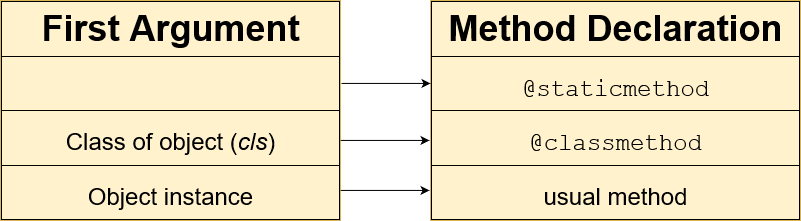

Методами класса удобно задавать такие функции, которые будут общими для всего класса и которые используют внутри себя какие-то другие атрибуты класса. Например, добавим функцию, которая для клиента красиво выведет полную информацию о его банке.

In [52]:
class Client(object):
    bank = "Sberbank"
    location = "Russia"
    
    def __init__(self, name, balance):
        self.name = name
        self.balance = balance + INITIAL_BONUS
        
        #define account level
        if self.balance < INTERMEDIATE_BALANCE:
            self.level = "Basic"
        elif self.balance < ADVANCED_BALANCE:
            self.level = "Intermediate"
        else:
            self.level = "Advanced"
            
    @classmethod
    def bank_location(cls):
        return str(cls.bank + " " + cls.location)
    
    @staticmethod
    def on_salary_date():
        print("Ура! Зарплата пришла!")

In [53]:
Client.bank_location()

'Sberbank Russia'

In [55]:
client = Client("Ivan", 100)
client.bank = "ABC"
client.bank_location()

'Sberbank Russia'

Статические методы не используют никакой информации об атрибутах класса или объекта. По сути, они нужны просто для разделения логики каких-то общих методов.

In [56]:
Client.on_salary_date()

Ура! Зарплата пришла!


In [57]:
client.on_salary_date()

Ура! Зарплата пришла!


## Properties

В питоне есть еще один интересный тип атрибутов - property. Это нечто среднее между полем и методом: объявляем метод, но используем как поле. Чаще всего это нужно либо для удобства доступа к какому-то динамически вычисляемому значению, либо для поддержки совместимости со старой версией кода. Еще распространенный случай - создание поля, значение которого нельзя менять извне. (На самом деле, можно, но об этом чуть ниже.) Посмотрим, как это работает: пусть нам иногда бывает нужно выводить деньги клиента в копейках, но при этом нельзя изменять баланс.

In [58]:
class Client(object):
    bank = "Sberbank"
    location = "Russia"
    
    def __init__(self, name, balance):
        self.name = name
        self.balance = balance + INITIAL_BONUS
        
        #define account level
        if self.balance < INTERMEDIATE_BALANCE:
            self.level = "Basic"
        elif self.balance < ADVANCED_BALANCE:
            self.level = "Intermediate"
        else:
            self.level = "Advanced"
    
    @property
    def pence(self):
        return self.balance * 100

Последние три строчки и задают наше property. При обращении к полю <code>pence</code> будет выполнен код, написанный в методе <code>pence</code>

In [59]:
client = Client("Ivan", 100)
client.balance

200

In [61]:
client.balance = 300

In [62]:
client.pence

30000

Но что если мы хотим иметь возможность и "присваивать" значения этому полю?

In [63]:
client.pence = 100

AttributeError: can't set attribute

Добавим специальный атрибут к нашему классу, который будет называться так же <code>pence</code>, и обернем его в <code>@pence.setter</code>. Это будет метод, который будет исполняться при попытке присвоить в поле <code>pence</code> значение.

In [64]:
class Client(object):
    bank = "Sberbank"
    location = "Russia"
    
    def __init__(self, name, balance):
        self.name = name
        self.balance = balance + INITIAL_BONUS
        
        #define account level
        if self.balance < INTERMEDIATE_BALANCE:
            self.level = "Basic"
        elif self.balance < ADVANCED_BALANCE:
            self.level = "Intermediate"
        else:
            self.level = "Advanced"
    
    @property
    def pence(self):
        return self.balance * 100
    
    @pence.setter
    def pence(self, value):
        self.balance = value / 100

Итак, мы обозначили 2 сущности: саму property (т.е. в данном случае метод-getter того, что мы хотим отдавать этим атрибутов) и setter - метод, который специальным образом обрабатывает входное значение <code>value</code>

In [67]:
client = Client("Ivan", 100)
client.pence = 200

In [68]:
client.balance

2.0

В общем случае у property есть 3 метода:
* getter
* setter
* deleter

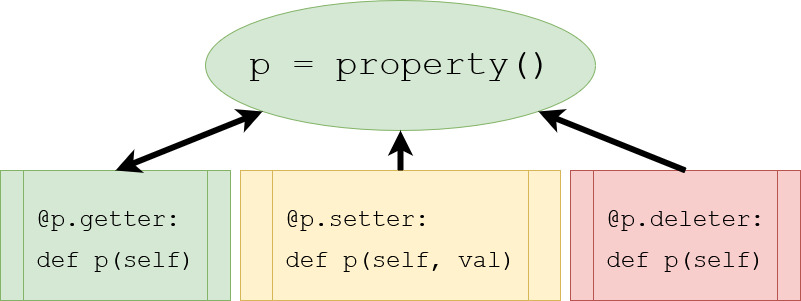

Рассмотрим еще пару способов задания property:

In [69]:
class PropertyClass1:
    def __init__(self):
        self._x = NotImplemented

    def get_x(self):
        return self._x

    def set_x(self, value):
        self._x = value

    def del_x(self):
        self._x = None

    x = property(get_x, set_x, del_x, 'Property x.')

In [70]:
p = PropertyClass1()
p.x

NotImplemented

In [71]:
class PropertyClass2:
    def __init__(self):
        self._x = NotImplemented

    x = property()

    @x.getter
    def x(self):
        """Property x."""
        return self._x

    @x.setter
    def x(self, value):
        self._x = value

    @x.deleter
    def x(self):
        self._x = None

In [72]:
p1 = PropertyClass1()
p2 = PropertyClass2()

p1.x, p2.x

(NotImplemented, NotImplemented)

In [73]:
p1.x, p2.x = 1, 2
p1.x, p2.x

(1, 2)

In [74]:
del p1.x
del p2.x
p1.x, p2.x

(None, None)

# Задание

Опишите класс Calculator, который будет реализовывать следующие методы:

- `sum(self, a, b)` - сложение чисел a и b
- `sub(self, a, b)` - вычитание
- `mul(self, a, b)` - умножение
- `div(self, a, b, mod=False)` - деление. Если параметр mod == True, то метод должен возвращать остаток от деления вместо деления. По умолчанию mod=False.
- `history(self, n)` - вывод на экран операции по ее номеру относительно текущего момента (1 - последняя, 2 - предпоследняя). Формат вывода: `sum(5, 15) == 20`
- `last` - строка того же формата, что в предыдущем пункте, в которой содержится информация о последней операции по всем созданным объектам калькулятора. Т.е. это последняя операция последнего использованного объекта калькулятор. Если операций пока не было, то None.
- `clear(cls)` - метод, который очищает `last`, т.е. присваивает ему значение None.

Проверить решение вы можете в контесте в задаче Классы 1. Калькулятор.

In [ ]:
# здесь вы можете описать решение задания



## Наследование в Python

Допустим, у нас есть класс, в котором перечислены различные поля и методы. Но нам нужно расширить функционал этого класса для некоторого подмножества его объектов. В этом случае мы можем написать класс, который будет **наследоваться** от базового. Он будет обладать всеми полями и методами базового класса, плюс мы можем дописать еще дополнительные методы и поля для объектов *дочернего* класса. Кроме того, при необходимости мы можем переопределить поля и методы базового (родительского) класса по-новому для дочернего.

Таким образом, **наследование** - это концепция объектно-ориентированного программирования, согласно которой абстрактный тип данных может наследовать данные и функциональность некоторого существующего типа, способствуя повторному использованию компонентов программного обеспечения.


Отнаследоваться от какого-то класса в питоне очень легко. Сразу рассмотрим на примере.

In [75]:
class Base:
    class_field = 42
    
    def __init__(self):
        self.instance_field = "I'm instance field"
        
    def some_instance_method(self, x):
        return x ** 2
    
    
class Inherited(Base):
    inherited_class_field = 24
    
    def inherited_class_method(self):
        return self.inherited_class_field / 2

<code>Base</code> - наш базовый класс с некоторым набором полей и методов. <code>Inherited</code> - класс-наследник. У него будут доступны <b>все</b> атрибуты класса <code>Base</code>.

In [76]:
base = Base()
print(base.class_field, base.instance_field, base.some_instance_method(10), sep='\n')

42
I'm instance field
100


In [77]:
inherited = Inherited()
print(inherited.class_field, inherited.instance_field, inherited.some_instance_method(10), sep='\n')

42
I'm instance field
100


Кроме того, конечно, можно добавлять и свои атрибуты.

In [80]:
inherited.inherited_class_field, inherited.inherited_class_method()

(24, 12.0)

А что если нужно не только переиспользовать какой-то метод, но и дописать туда какие-то действия? Для этого есть системная функция <code>super</code>.

In [81]:
class Builder:    
    def __init__(self, name):
        self.name = name
        self.helmet = None
        print(f"Строитель {self.name} проснулся и готов работать")
        
    def put_on_helmet(self, helmet_number):
        self.helmet = helmet_number
        print(f"Строитель {self.name} надел каску с номером {helmet_number}")
        

class Driver(Builder):
    def __init__(self, name):
        super(Driver, self).__init__(name)
        print(f"Строитель {self.name} сегодня назначен водителем и везёт всех на стройку")

Синтаксис функции <code>super</code>:
* класс, метод родителя которого нужно вызвать
* [опционально] первый аргумент метода класса-родителя, который нужно вызвать. Для обычных методов это self - инстанс объекта

На самом деле, у этой функции несколько сигнатур, и для каждой она возвращает что-то свое. Процитируем документацию:

* <code>super() -> same as super(__class__, [first argument])</code>
* <code>super(type) -> unbound super object</code>
* <code>super(type, obj) -> bound super object; requires isinstance(obj, type)</code>
* <code>super(type, type2) -> bound super object; requires issubclass(type2, type)</code>

В нашем текущем случае функция вернет <i>bound super object</i>, т.е. специальный "привязанный" к нашему инстансу объект класса-родителя.

In [82]:
b1 = Builder("Вася")

Строитель Вася проснулся и готов работать


In [83]:
b1.put_on_helmet(25)

Строитель Вася надел каску с номером 25


In [84]:
b2 = Driver("Евпатий")

Строитель Евпатий проснулся и готов работать
Строитель Евпатий сегодня назначен водителем и везёт всех на стройку


In [85]:
b2.put_on_helmet(34)

Строитель Евпатий надел каску с номером 34


## Множественное наследование

В питоне реализовано множественное наследование, т.е. наследование от нескольких классов.

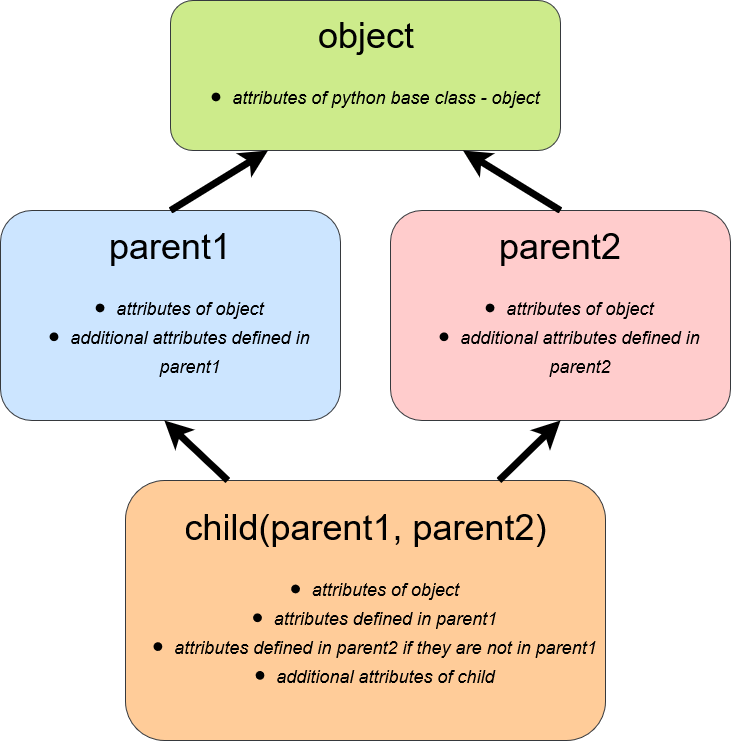

Иерархия типов в питоне довольно простая: абсолютно любая сущность - это объект, отнаследованный от базового класса <code>object</code>.

In [91]:
class Person(object):
    def __init__(self, name):
        self.name = name
        print(f"Человек {self.name} проснулся")
        
    def move(self):
        print(f"Человек {self.name} пытается встать с кровати")
        

class Pedestrian(Person):
    def move(self):
        print(f"Человек {self.name} пошел пешком")
    
    def wave(self):
        print("Помахал рукой")
        

class Driver(Person):
    def move(self):
        print(f"Человек {self.name} поехал на машине")
        
    def beep(self):
        print("Побибикал")
        

class Ivan(Pedestrian, Driver):
    pass

В предыдущей ячейке мы определили 4 класса: базовый "Человек", два его наследника "Пешеход" и "Водитель" и класс "Иван", который отнаследован от обоих этих классов. "Иван" будет уметь всё, что умеют его классы-родители, но в приоритете будут те классы, которые ближе по иерархии. Ниже приведена схема, в каком порядке "Иван" будет искать у себя или у классов-родителей запрашиваемые атрибуты.

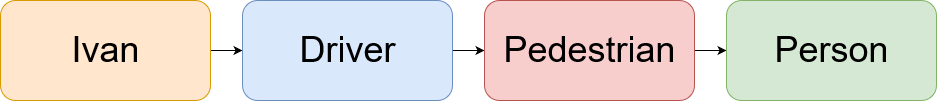

In [87]:
Person("Владимир").move()

Человек Владимир проснулся
Человек Владимир пытается встать с кровати


In [88]:
Driver("Ольга").move()

Человек Ольга проснулся
Человек Ольга поехал на машине


In [89]:
Pedestrian("Вася").move()

Человек Вася проснулся
Человек Вася пошел пешком


In [92]:
Ivan("Иван").move()

Человек Иван проснулся
Человек Иван пошел пешком


In [93]:
Driver("Иван").wave()

Человек Иван проснулся


AttributeError: 'Driver' object has no attribute 'wave'

Объект класса <code>Ivan</code> пытается найти у себя метод <code>move</code>, но он не определен в самом классе. Поиск продолжается в классе ближайшего родителя, т.е. первого, указанного при объявлении класса. В классе <code>Driver</code> этот метод уже определен, и поэтому дальше поиск прекращается и вызывается этот метод.

Для каждого класса можно посмотреть стек поиска атрибутов (иерархию наследования):

In [94]:
Ivan.mro()

[__main__.Ivan, __main__.Pedestrian, __main__.Driver, __main__.Person, object]

## Области видимости атрибутов

В питоне все атрибуты классов публичные. Но как быть с теми полями, изменения которых извне мы не хотим учитывать в нашем коде? Для того, чтобы другие программисты знали, какие атрибуты класса использовать во внешнем коде нельзя, были придуманы согласования о наименовании атрибутов:

### Naming conventions:

* interface
* \_internal
* __private
* \_\_magicattrs\_\_ (о них - ниже)

Приведем пример internal-аттрибутов:

In [95]:
class Circle:
    _pi = 3.14
    
    def __init__(self, radius):
        self.radius = radius
        
    def _compute_diameter(self):
        return 2 * self.radius
    
    def get_square(self):
        return self._pi * (self.radius ** 2)
    
    def get_length(self):
        return self._pi * self._compute_diameter()

    
class CircleChild(Circle):
    def show_pi(self):
        return self._pi

In [103]:
circle = Circle(50)
circle.get_square()

7500

In [102]:
circle.get_length()

300

In [104]:
circle._pi

3

In [99]:
circle._compute_diameter()

100

In [100]:
CircleChild(5).show_pi()

3.14

In [101]:
Circle._pi = 3

Мы можем достучаться извне до любого атрибута. Но тем не менее надо иметь в виду, что использование таких названий атрибутов в классах означает, что код задуман так, что не подразумевает их использование где-то вовне.

Более интересная ситуация возникает с т.н. private-атрибутами. В питоне их всё равно можно получить из внешней среды. Чтобы понять, для чего они нужны, объявим следующие классы:

In [105]:
class Worker:
    __premium_coef = 1
    
    def __init__(self, salary):
        self.salary = salary
    
    def overall_salary(self):
        return self.salary * 12 + self.salary * self.__premium_coef


class SeniorWorker(Worker):
    __senior_bonus = 300_000
    
    def overall_salary(self):
        return self.salary * 12 + self.salary * self.__premium_coef + self.__senior_bonus

В базовом классе <code>Worker</code> объявлен метод, который считает зарплату с учетом премии. Отнаследуем от него класс опытного работника, у которого коэффициент премии будет выше.

In [106]:
w = Worker(100_000)
w.overall_salary()

1300000

In [107]:
w.__premium_coef

AttributeError: 'Worker' object has no attribute '__premium_coef'

In [108]:
sw = SeniorWorker(200_000)
sw.overall_salary()

AttributeError: 'SeniorWorker' object has no attribute '_SeniorWorker__premium_coef'

Видим, что возникают странные ошибки. В первом случае: <code>'Worker' object has no attribute '\__premium_coef'</code>. У класса <code>Worker</code> почему-то не определено поле <code>\__premium_coef</code>, которое мы явно определили.

Кроме того, когда мы пытаемся вызвать это поле у класса-наследника, интерпретатор почему-то обращается не к тому полю, которое мы определили, а к <code>\_SeniorWorker__premium_coef</code>. Однако

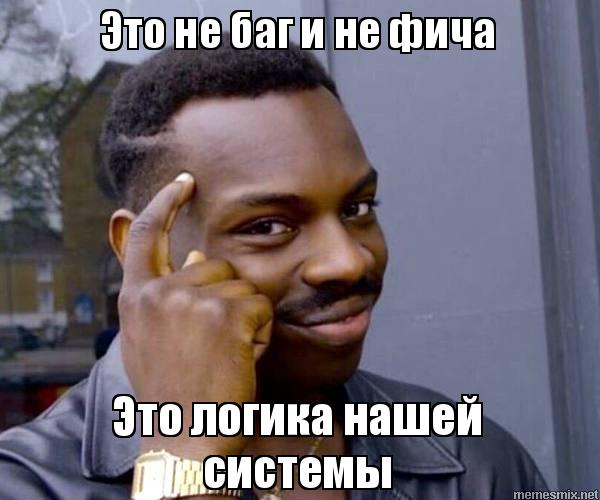

Атрибут, название которого при объявлении начинается на двойное подчеркивание (но не заканчивается им же), можно получить, обращаясь по схеме:

* `_[ClassName]__[attribute_name]`

Это сделано для того, чтобы самые важные поля и методы класса-родителя не были случайно переопределены у классов-наследников.

In [110]:
Worker.__dict__

mappingproxy({'__module__': '__main__',
              '_Worker__premium_coef': 1,
              '__init__': <function __main__.Worker.__init__(self, salary)>,
              'overall_salary': <function __main__.Worker.overall_salary(self)>,
              '__dict__': <attribute '__dict__' of 'Worker' objects>,
              '__weakref__': <attribute '__weakref__' of 'Worker' objects>,
              '__doc__': None})

In [111]:
w._Worker__premium_coef

1

In [112]:
class SeniorWorker(Worker):
    __senior_bonus = 300_000
    
    def overall_salary(self):
        return self.salary * 12 + self.salary * self._Worker__premium_coef + self.__senior_bonus

sw = SeniorWorker(200_000)
sw.overall_salary()

2900000

## Magic methods

Итак, мы разобрались с областью видимости различных атрибутов классов. Ниже мы рассмотрим еще один интересный и важный тип публичных атрибутов.

Давайте рассмотрим, как работает функция <code>len</code>, которая считает длину коллекции.

In [113]:
a = [1, 2, 4, 8, 16]
len(a)

5

Может быть, она вызывает какой-то внутренний метод коллекции? Посмотрим, какие есть:

In [114]:
dir(a)

['__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__rmul__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'append',
 'clear',
 'copy',
 'count',
 'extend',
 'index',
 'insert',
 'pop',
 'remove',
 'reverse',
 'sort']

В этом списке мы видим метод `__len__`. Как раз он и возвращает длину коллекции. Встроенная функция `len` просто пытается вызвать у объекта метод `__len__`. Если он определен, то возвращается его возвращаемое значение, если нет - возникает TypeError, т.е. ошибка типа подаваемого значения. Таким образом, мы можем написать свою функцию определения длины коллекции (разве что ошибка в случае неопределенного `__len__` будет другой:

In [115]:
def our_len(some_object):
    return some_object.__len__()

our_len(a)

5

In [116]:
our_len(5)

AttributeError: 'int' object has no attribute '__len__'

In [117]:
len(5)

TypeError: object of type 'int' has no len()

Для чего нам вообще может понадобиться определение метода `__len__`? Например, чтобы считать "длиной" приближенную продолжительность музыкального трека. Почему приближенную? Потому что одно из требований к методу `__len__` - возвращать int.

In [118]:
class Track:
    def __init__(self, values_list, sample_rate=22050):
        self.values_list = values_list
        self.sample_rate = sample_rate
    
    def __len__(self):
        return round(self.values_list.__len__() / self.sample_rate)

In [119]:
track = Track([25] * 100_000)
len(track), our_len(track)

(5, 5)

### Текстовое представление класса

Рассмотрим еще пару часто встречаемых случаев. Например, очень часто требуется задать какое-то текстовое представление класса. Делается это методом `__str__`

In [120]:
class Student:
    def __init__(self, name, group):
        self.name = name
        self.group = group

По умолчанию текстовым представлением является строка с типом объекта и его адресом в памяти, что нам, как разработчикам, скорее всего неинформативно.

In [121]:
s = Student("Никодим", "21")
print(s)

In [122]:
str(s)

'<__main__.Student object at 0x7fa808729070>'

Переопределим метод так, чтобы можно было понять, какого студента в данный момент обрабатывает скрипт

In [123]:
class Student:
    def __init__(self, name, group):
        self.name = name
        self.group = group
    
    def __str__(self):
        return f"Student {self.name} from the group {self.group}"

In [124]:
s = Student("Никодим", "21")
print(s)

Student Никодим from the group 21


### Определение математических операторов

Допустим, мы пишем класс, объекты которого мы хотим как-то складывать.

In [125]:
class Meal:
    def __init__(self, title, price):
        self.title = title
        self.price = price
        
    def __str__(self):
        return ': '.join([self.title, str(self.price)])
    
    def __repr__(self):
        """Функция, которая используется для текстового представления объекта в случаях, когда это происходит не
        через функцию str(obj)"""
        return str(self)
    
    def __add__(self, other):
        """Функция, которая описывает прибавление к нашему объекту объекта other"""
        # если у нас оба объекта данного класса, сложим их атрибуты
        if isinstance(other, Meal):
            new_title = ', '.join([self.title, other.title])
            new_price = self.price + other.price
        else:
            # а если второй объект не этого класса, то попробуем его привести к типу float
            new_title = self.title + " и что-то еще"
            new_price = self.price + float(other)
        return Meal(new_title, new_price)

In [126]:
Meal("БигМак", 200)

БигМак: 200

In [127]:
Meal("БигМак", 200) + Meal("Картошка", 50)

БигМак, Картошка: 250

In [128]:
Meal("БигМак", 200) + 25

БигМак и что-то еще: 225.0

Всё работает по нашей логике, но в следующем коде будет ошибка:

In [129]:
25 + Meal("БигМак", 200)

TypeError: unsupported operand type(s) for +: 'int' and 'Meal'

Это произошло, поскольку у нас определено сложение только <code>Meal + что-то</code>, но не <code>что-то + Meal</code>. В случаях, когда складываемые объекты разных типов, операция сложения в питоне некоммутативна. Чтобы определить обратное сложение, добавим метод <code>\__radd__</code>

In [130]:
Meal.__radd__ = Meal.__add__

In [131]:
25 + Meal("БигМак", 200)

БигМак и что-то еще: 225.0

И совсем высший пилотаж: добавим метод, который позволит по вызову нашего объекта как функции "съедать" его =)

In [132]:
def our_call_method(self):
    self.title = "Ты всё съел!"
    self.price = -self.price
    print(self)
    
Meal.__call__ = our_call_method

In [133]:
m = Meal("Борщ", 150)
m()

Ты всё съел!: -150


In [134]:
m

Ты всё съел!: -150

Неплохая статья по магическим методам: https://habr.com/ru/post/186608/

# Задание

Написать классы, которые будут использованы как счета в банке. Каждый счет - в своей валюте. Соответственно, у каждого объекта счета должны быть атрибуты с суммой денег, хранящихся на нём, и название кошелька. Каждый класс счета должен в себе хранить коэффициент отношения стоимости своей валюты к базовой валюте.

Нам понадобится один базовый класс `BaseWallet`, в котором будут реализованы общие для всех валютных счетов методы, и три класса для конкретных валютных счетов: `RubleWallet, DollarWallet, EuroWallet`. Будем считать коэффициентами отношения валют к базовой валюте:

- Рубль: 1
- Доллар: 60
- Евро: 70

### Критерии выполнения задания

Протокол взаимодействия объектов следующий:

- `RubleWallet("Первый кошелек", 10)`, где "Первый кошелек" - это название кошелька, а 10 - сумма денег на нём.
- аналогичные конструкторы для других счетов
- `RubbleWallet("X", 10) + 20 == RubbleWallet("X", 30)` - при сложении с числом считаем, что это та же валюта.
- `RubbleWallet("X", 10) += 20` - должен поддерживаться и такой синтаксис
- `20 + RubbleWallet("X", 10) == RubbleWallet("X", 30)` - radd для чисел
- `RubbleWallet("X", 20) + DollarWallet("D", 10) == RubbleWallet("X", 80)` - конвертация валюты при сложении счетов.
- `DollarWallet("D", 2) + RubbleWallet("X", 60) == DollarWallet("D", 3)` - результат - в валюте первого слагаемого.
- `DollarWallet("D", 2) += RubbleWallet("X", 60)` - здесь тоже должен поддерживаться этот синтаксис.
- предыдущие 6 пунктов реализовать и для вычитания
- `RubbleWallet("X", 10) * 20 == RubbleWallet("X", 200)` - умножение на число
- `RubbleWallet("X", 10) *= 20` - тоже с таким синтаксисом
- те же 2 пункта для деления
- `20 * RubbleWallet("X", 10) == RubbleWallet("X", 200)` - умножение числа на кошелек
- `DollarWallet("A", 15) == DollarWallet("B", 15)`: два объекта равны, если у них совпадает тип кошелька и сумма на счете.
- `RubleWallet("X", 100).spend_all()` - для любого типа кошелька релизовать функцию, которая обнуляет баланс, если он положительный
- `DollarWallet("X", 1).to_base() == 60` - эта функция должна возвращать число денег в кошельке в базовой валюте
- `print(DollarWallet("Q", 150))` - должна выводить строку: 'Dollar Wallet Q 150' (и аналогично Ruble и Euro для остальных кошельков)

У каждого объекта должны быть доступны атрибуты:

- `name` - название кошелька
- `amount` - количество денег на счете
- `exchange_rate` - коэффициент стоимости валюты к базовой

Проверить решение задания вы можете в контесте в задаче Классы 2. Кошельки.

In [ ]:
# здесь вы можете описать решение

